# Task: Generate Meaningful Restaurant Recommendations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
df = pd.read_csv('/content/TripAdvisor_RestauarantRecommendation.csv')

In [ ]:
df.head(10)
#trim "reviews" from No of Reviews
#get the first number from "Reviews" column
#drop "Menu", "Contact Number", "Trip_advisor Url"

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Contact Number,Trip_advisor Url,Menu,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,+1 415-757-0569,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337","Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",+1 201-488-4999,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,+1 845-849-2839,https://www.tripadvisor.com//Restaurant_Review...,http://tabletalkdiner.com/menu/breakfast/,$$ - $$$
3,Sixty Vines,3701 Dallas Pkwy,"Plano, TX 75093-7777","American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,+1 469-620-8463,https://www.tripadvisor.com//Restaurant_Review...,https://sixtyvines.com/menu/plano-tx/,$$ - $$$
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,+1 315-458-1662,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
5,E Tutto Qua,270 Columbus Ave,"San Francisco, CA 94133-4518","Seafood, Italian, Pizza",4.5 of 5 bubbles,"1,406 reviews",NaN,+1 415-989-1002,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
6,Black Angus Steakhouse - Federal Way,2400 S 320th St,"Federal Way, WA 98003-5465","American, Steakhouse, Bar",4 of 5 bubbles,220 reviews,This is an easy any time place to have dinner!...,+1 253-839-8370,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
7,Ziziki's,11663 Preston Rd,"Dallas, TX 75230-2704","Mediterranean, Greek, Healthy",4.5 of 5 bubbles,89 reviews,My husband and I went to Greece last fall and ...,+1 469-232-9922,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
8,Vince's Italian Restaurant & Pizzeria,2815 NE Sunset Blvd,"Renton, WA 98056-3105","Italian, Pizza, Vegetarian Friendly",4 of 5 bubbles,90 reviews,I love Vince's pizza and I was in the neighbor...,+1 425-226-8180,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
9,John Thomas Steakhouse,1152 Danby Rd,"Ithaca, NY 14850-8927","American, Steakhouse, Gluten Free Options",4 of 5 bubbles,258 reviews,"The ambience, food and service were all excell...",+1 607-273-3464,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$$$


In [ ]:
df.columns

Index(['Name', 'Street Address', 'Location', 'Type', 'Reviews',
       'No of Reviews', 'Comments', 'Contact Number', 'Trip_advisor Url',
       'Menu', 'Price_Range'],
      dtype='object')

In [ ]:
df_copy = df.copy()
df_copy = df_copy.drop(['Menu', 'Contact Number', 'Trip_advisor Url'], axis=1)

In [ ]:
df_copy.head()

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337","Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,$$ - $$$
3,Sixty Vines,3701 Dallas Pkwy,"Plano, TX 75093-7777","American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,$$ - $$$
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,$$ - $$$


In [ ]:
df_copy.isnull().sum()

,0
Name,0
Street Address,0
Location,0
Type,13
Reviews,0
No of Reviews,0
Comments,615
Price_Range,0


In [ ]:
print(df_copy.Reviews.unique())

['4.5 of 5 bubbles' '4 of 5 bubbles' '5 of 5 bubbles' '3.5 of 5 bubbles'
 '3 of 5 bubbles' 'No review']


In [ ]:
print(df_copy['No of Reviews'].unique())

['243 reviews' '84 reviews' '256 reviews' '235 reviews' '285 reviews'
 '1,406 reviews' '220 reviews' '89 reviews' '90 reviews' '258 reviews'
 '271 reviews' '87 reviews' '118 reviews' '706 reviews' '104 reviews'
 '314 reviews' '193 reviews' '1,198 reviews' '280 reviews' '1,807 reviews'
 '642 reviews' '928 reviews' '30 reviews' '179 reviews' '746 reviews'
 '119 reviews' '829 reviews' '515 reviews' '123 reviews' '189 reviews'
 '39 reviews' '742 reviews' '264 reviews' '399 reviews' '111 reviews'
 '24 reviews' '187 reviews' '1,653 reviews' '223 reviews' '153 reviews'
 '240 reviews' '364 reviews' '191 reviews' '775 reviews' '124 reviews'
 '198 reviews' '292 reviews' '29 reviews' '683 reviews' '27 reviews'
 '214 reviews' '513 reviews' '44 reviews' '28 reviews' '611 reviews'
 '307 reviews' '440 reviews' '660 reviews' '413 reviews' '135 reviews'
 '74 reviews' '160 reviews' '273 reviews' '86 reviews' '932 reviews'
 '378 reviews' '217 reviews' '437 reviews' '138 reviews' '51 reviews'
 '100 review

In [ ]:
display(df_copy[df_copy.Reviews == 'No review'])

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
1744,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified
2866,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified


In [ ]:
display(df_copy[df_copy['No of Reviews'] == 'Undefined Number'])

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
1744,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified
2866,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified


In [ ]:
df_copy = df_copy.drop([1744,2866])
df_copy = df_copy.reset_index(drop=True)
df_copy

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337","Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,$$ - $$$
3,Sixty Vines,3701 Dallas Pkwy,"Plano, TX 75093-7777","American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,$$ - $$$
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,$$ - $$$
...,...,...,...,...,...,...,...,...
3055,Indigo Kitchen & Ale House,2902 164th St SW,"Lynnwood, WA 98087-3201","American, Bar, Vegetarian Friendly",4.5 of 5 bubbles,198 reviews,We had to wait a few minutes to get it but it ...,$$ - $$$
3056,City Vineyard,233 West Street,"New York City, NY 10013","American, Bar, Seafood",4.5 of 5 bubbles,374 reviews,"Came here to see Andrea Gibson perform, we wer...",$$ - $$$
3057,BRIO Tuscan Grille,3710 US Highway 9,"Freehold, NJ 07728-4801","Steakhouse, Italian, Bar",4 of 5 bubbles,211 reviews,We come to Brio once a month. They are good fo...,$$ - $$$
3058,Maywood Pancake house,92 W Pleasant Ave,"Maywood, NJ 07607-1336","American, Vegan Options, Gluten Free Options",4 of 5 bubbles,87 reviews,Stopped in yesterday for Breakfast. When in Je...,$$ - $$$


In [ ]:
df_copy.Comments = df_copy.Comments.fillna('')

In [ ]:
df_copy.Type = df_copy.Type.fillna(df_copy.Type.value_counts().index[0])

In [ ]:
df_copy.isnull().sum()

,0
Name,0
Street Address,0
Location,0
Type,0
Reviews,0
No of Reviews,0
Comments,0
Price_Range,0


In [ ]:
#********* To better see the types of cuisines and do operations on them more easily we append them to a list and then convert that list to a pandas series ***************

types = []
for i in range(len(df_copy)):
  if type(df_copy.Type[i]) == str:
    types.append(df_copy.Type[i].split(','))
flat_list = list(itertools.chain(*types))
series = pd.Series(flat_list)

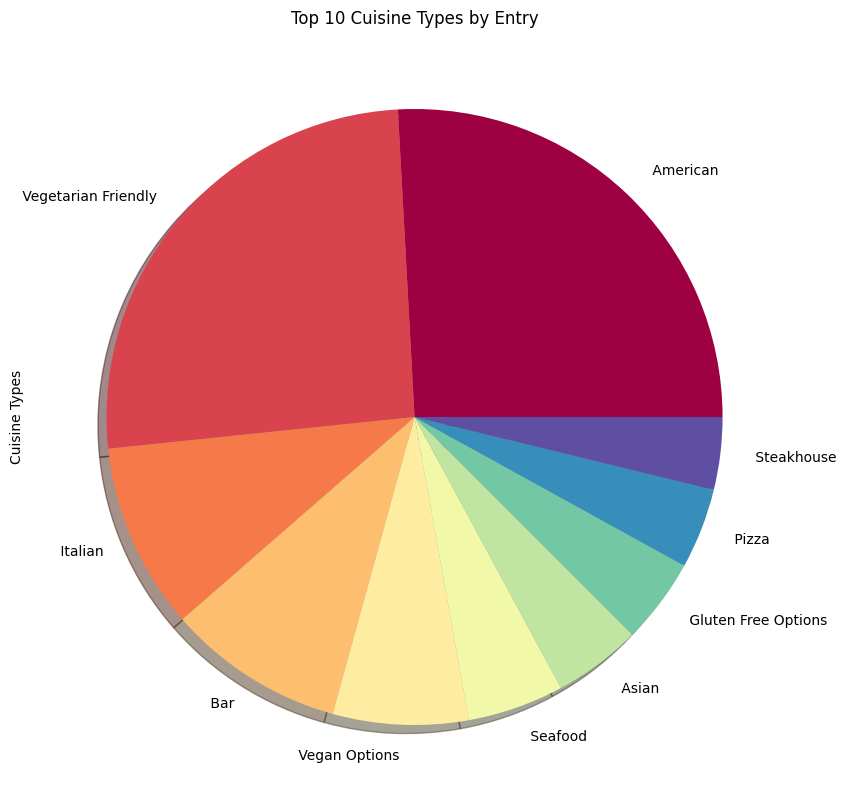

In [ ]:
ax = series.value_counts()[:10].plot(kind = "pie", shadow = True, cmap = plt.get_cmap('Spectral'), figsize=(10,10))
ax.set_ylabel('Cuisine Types')
plot = ax.set_title('Top 10 Cuisine Types by Entry')
#

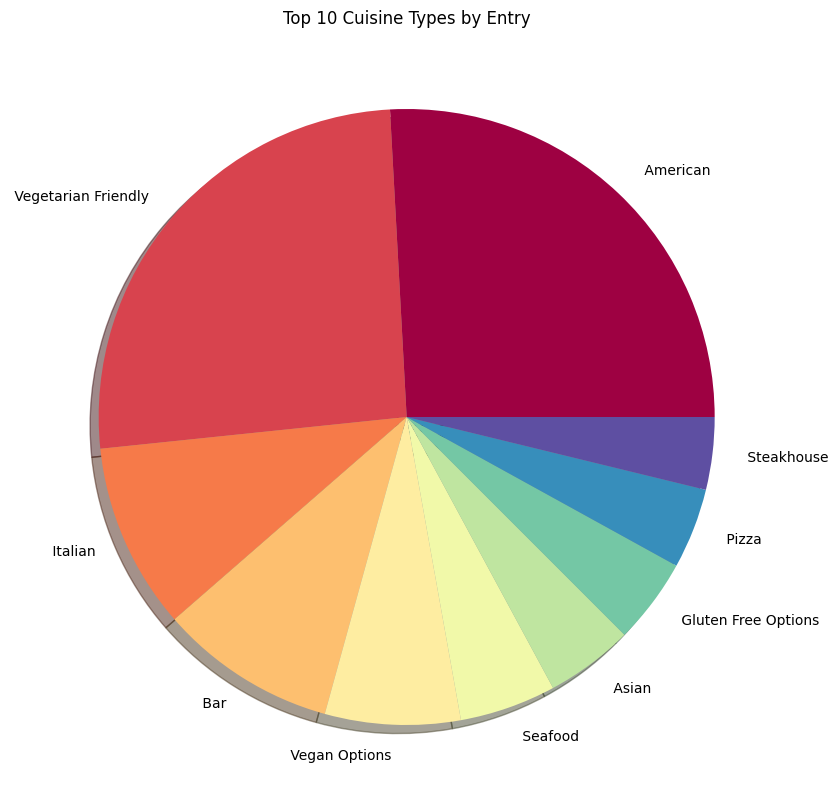

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'series' is already defined and contains the flat list of cuisines

# Step 1: Get the top 10 most frequent types
ax = series.value_counts()[:10].plot(
    kind='pie',           # Plot as a pie chart
    shadow=True,          # Add shadow for visual effect
    cmap=plt.get_cmap('Spectral'),  # Use the 'Spectral' colormap
    figsize=(10, 10)      # Set the figure size
)

# Step 2: Customize the plot
ax.set_ylabel('')  # Optional: Remove y-label for a cleaner look
ax.set_title('Top 10 Cuisine Types by Entry')  # Set the title

# Display the plot
plt.show()

In [ ]:
pd.DataFrame({"No of Restaurant serving":series.value_counts()}).head(10)

,No of Restaurant serving
American,1558
Vegetarian Friendly,1553
Italian,588
Bar,561
Vegan Options,428
Seafood,305
Asian,278
Gluten Free Options,270
Pizza,254
Steakhouse,229


# List Comprehension
 important!!!


In [ ]:
df_copy['State'] = [i.split(',')[-1].split(" ")[1] for i in df_copy.Location]
df_copy['Zipcode'] = [i.split(',')[-1].split(" ")[-1] for i in df_copy.Location]
df_copy['City'] = [",".join(i.split(",")[:-1]) for i in df_copy.Location] #********************************* Beautifullll for a newbieee!!!!! **************************************
df_copy = df_copy.drop(['Location'], axis=1)

df_copy

,Name,Street Address,Type,Reviews,No of Reviews,Comments,Price_Range,State,Zipcode,City
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,,$$ - $$$,CA,94133-3908,San Francisco
1,Coach House Diner,55 State Rt 4,"Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",$$ - $$$,NJ,07601-6337,Hackensack
2,Table Talk Diner,2521 South Rd Ste C,"American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,$$ - $$$,NY,12601-5476,Poughkeepsie
3,Sixty Vines,3701 Dallas Pkwy,"American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,$$ - $$$,TX,75093-7777,Plano
4,The Clam Bar,3914 Brewerton Rd,"American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,$$ - $$$,NY,13212,Syracuse
...,...,...,...,...,...,...,...,...,...,...
3055,Indigo Kitchen & Ale House,2902 164th St SW,"American, Bar, Vegetarian Friendly",4.5 of 5 bubbles,198 reviews,We had to wait a few minutes to get it but it ...,$$ - $$$,WA,98087-3201,Lynnwood
3056,City Vineyard,233 West Street,"American, Bar, Seafood",4.5 of 5 bubbles,374 reviews,"Came here to see Andrea Gibson perform, we wer...",$$ - $$$,NY,10013,New York City
3057,BRIO Tuscan Grille,3710 US Highway 9,"Steakhouse, Italian, Bar",4 of 5 bubbles,211 reviews,We come to Brio once a month. They are good fo...,$$ - $$$,NJ,07728-4801,Freehold
3058,Maywood Pancake house,92 W Pleasant Ave,"American, Vegan Options, Gluten Free Options",4 of 5 bubbles,87 reviews,Stopped in yesterday for Breakfast. When in Je...,$$ - $$$,NJ,07607-1336,Maywood


In [ ]:
print(df_copy[['City', 'State', 'Zipcode']].isnull().sum())

City       0
State      0
Zipcode    0
dtype: int64


In [ ]:
df_copy = df_copy.drop(df_copy[df_copy['State']==''].index[0])
df_copy.State.value_counts()

,count
State,
NY,650
CA,615
TX,614
WA,606
NJ,563
PA,9
OR,2


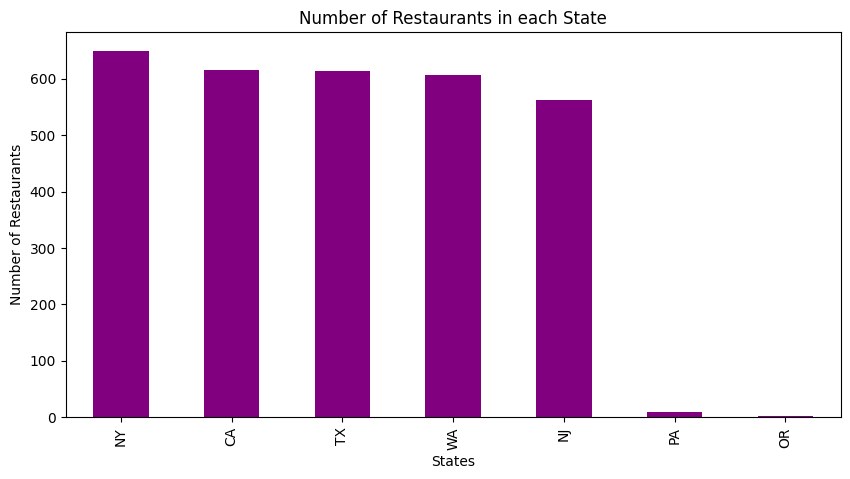

In [ ]:
ax = df_copy.State.value_counts().plot(kind = "bar", color= 'Purple', figsize=(10,5))
ax.set_ylabel('Number of Restaurants')
ax.set_xlabel('States')
plot = ax.set_title('Number of Restaurants in each State')

In [ ]:
pd.DataFrame({'No of Restaurants per State':df_copy.State.value_counts()}).head(10)

,No of Restaurants per State
State,
NY,650
CA,615
TX,614
WA,606
NJ,563
PA,9
OR,2


C. Ranking the best (most highly rated) restaurants from each state
Now most highly rated restaurant has to include two factors: -
Number of people who reviewed
Review Ratings on 5


In [ ]:
df_copy['Reviews'] = [float(i.split(" ")[0]) for i in df_copy.Reviews]
df_copy['No of Reviews'] = [int(i.split(" ")[0].replace(",","")) for i in df_copy['No of Reviews']]

df_copy

,Name,Street Address,Type,Reviews,No of Reviews,Comments,Price_Range,State,Zipcode,City
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"Seafood, Vegetarian Friendly, Vegan Options",4.5,243,,$$ - $$$,CA,94133-3908,San Francisco
1,Coach House Diner,55 State Rt 4,"Diner, American, Vegetarian Friendly",4.0,84,"Both times we were there very late, after 11 P...",$$ - $$$,NJ,07601-6337,Hackensack
2,Table Talk Diner,2521 South Rd Ste C,"American, Diner, Vegetarian Friendly",4.0,256,Waitress was very friendly but a little pricey...,$$ - $$$,NY,12601-5476,Poughkeepsie
3,Sixty Vines,3701 Dallas Pkwy,"American, Wine Bar, Vegetarian Friendly",4.5,235,Not sure why I went there for the second time....,$$ - $$$,TX,75093-7777,Plano
4,The Clam Bar,3914 Brewerton Rd,"American, Bar, Seafood",4.0,285,Doesn't look like much from the outside but wa...,$$ - $$$,NY,13212,Syracuse
...,...,...,...,...,...,...,...,...,...,...
3055,Indigo Kitchen & Ale House,2902 164th St SW,"American, Bar, Vegetarian Friendly",4.5,198,We had to wait a few minutes to get it but it ...,$$ - $$$,WA,98087-3201,Lynnwood
3056,City Vineyard,233 West Street,"American, Bar, Seafood",4.5,374,"Came here to see Andrea Gibson perform, we wer...",$$ - $$$,NY,10013,New York City
3057,BRIO Tuscan Grille,3710 US Highway 9,"Steakhouse, Italian, Bar",4.0,211,We come to Brio once a month. They are good fo...,$$ - $$$,NJ,07728-4801,Freehold
3058,Maywood Pancake house,92 W Pleasant Ave,"American, Vegan Options, Gluten Free Options",4.0,87,Stopped in yesterday for Breakfast. When in Je...,$$ - $$$,NJ,07607-1336,Maywood


In [ ]:
df_copy = df_copy.drop([1744,2866])

In [ ]:
df_copy['weighted_ratings'] = df_copy['Reviews'] * df_copy['No of Reviews']

Weighted Ratings Calculation:
The weighted_ratings is calculated as follows:

**kalın metin**
df['weighted_ratings'] = df.Reviews * df['No of Reviews']
Reviews: This might represent the average rating given by reviewers.
No of Reviews: This represents the number of reviews a particular item (e.g., product, movie, etc.) received.
Weighted Ratings Explained:
The weighted_ratings is essentially the total score or total rating points calculated by multiplying the average rating by the number of reviews. This gives more weight to ratings that have a larger number of reviews, which makes sense because a rating with more reviews is generally more reliable than a rating based on just a few reviews.
Why the Maximum Might Be Selected:
Given this calculation, selecting the maximum weighted_ratings could make sense in certain contexts:

Best Overall Rating: The maximum weighted_ratings might represent the item that received the most total positive feedback, considering both the number of reviews and the average rating.

Dominant Opinion: Since weighted_ratings is a product of the average rating and the number of reviews, a high value suggests both a high average rating and a significant number of reviews. Therefore, selecting the maximum could highlight the most positively received item.

Is There a Method Like This?
While this approach is not standard in statistical analysis, it is a practical method in scenarios like product reviews, where:

The highest weighted_ratings can represent the product with the most significant overall positive sentiment.
Summary:
Purpose of Maximum: Selecting the maximum weighted_ratings likely aims to identify the item that not only has a high average rating but also a large number of reviewers backing that rating.
Context-Specific Logic: This method isn't about finding a statistical mean but rather about identifying the most robustly positive response within your dataset.
If the analysis is intended to find the item that stands out most in terms of positive feedback (both in terms of quantity and quality), then using the maximum of weighted_ratings is reasonable.

In [ ]:
df_copy['weighted_ratings']

,weighted_ratings
0,1093.5
1,336.0
2,1024.0
3,1057.5
4,1140.0
...,...
3055,891.0
3056,1683.0
3057,844.0
3058,348.0


In [ ]:
labels = df_copy.State.unique().flatten()
labels


array(['CA', 'NJ', 'NY', 'TX', 'WA', 'OR', 'PA'], dtype=object)

<ipython-input-34-1b2dce4b289e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.catplot(x='State', y="Average Weighted Ratings", kind = 'bar', data= avg_wt_ratings, palette ="rocket")


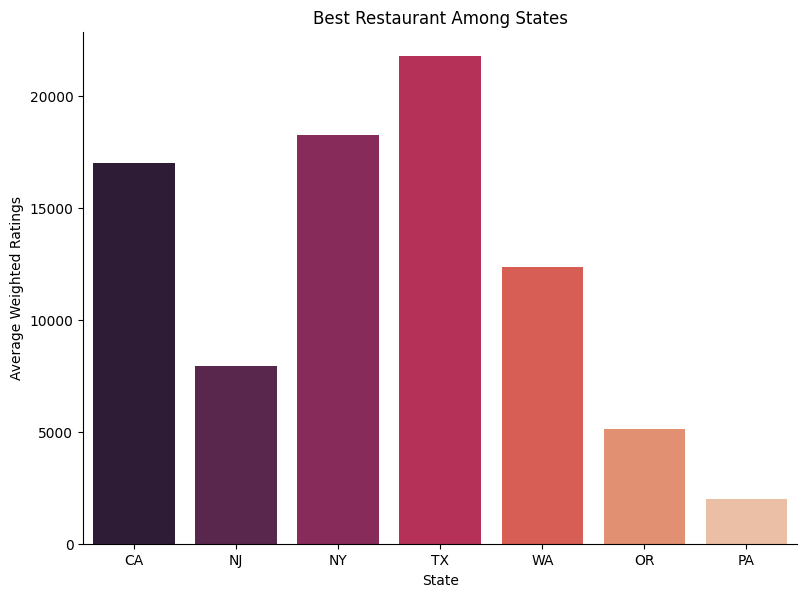

In [ ]:
average_vote_share_list = [df_copy[df_copy.State == i].weighted_ratings.max() for i in labels]
avg_wt_ratings = pd.DataFrame({'State':labels, 'Average Weighted Ratings':average_vote_share_list})
plot = sns.catplot(x='State', y="Average Weighted Ratings", kind = 'bar', data= avg_wt_ratings, palette ="rocket")
plt.title('Best Restaurant Among States')
plt.gcf().set_size_inches(9, 6)

In [ ]:
df_copy[df_copy['weighted_ratings']==df_copy['weighted_ratings'].max()]

,Name,Street Address,Type,Reviews,No of Reviews,Comments,Price_Range,State,Zipcode,City,weighted_ratings
2164,Big Texan Steak Ranch,7701 E Interstate 40,"American, Steakhouse, Southwestern",4.0,5448,Roquefort dressing homemade and delicious. I h...,$$ - $$$,TX,79118-6915,Amarillo,21792.0


In [ ]:
df_copy[df_copy['No of Reviews'] == df_copy['No of Reviews'].max()]

,Name,Street Address,Type,Reviews,No of Reviews,Comments,Price_Range,State,Zipcode,City,weighted_ratings
2164,Big Texan Steak Ranch,7701 E Interstate 40,"American, Steakhouse, Southwestern",4.0,5448,Roquefort dressing homemade and delicious. I h...,$$ - $$$,TX,79118-6915,Amarillo,21792.0


<ipython-input-37-93d45838c0c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.catplot(x='State', y="Total Weighted Ratings", kind = 'bar', data= total_vote_share, palette ="rocket")


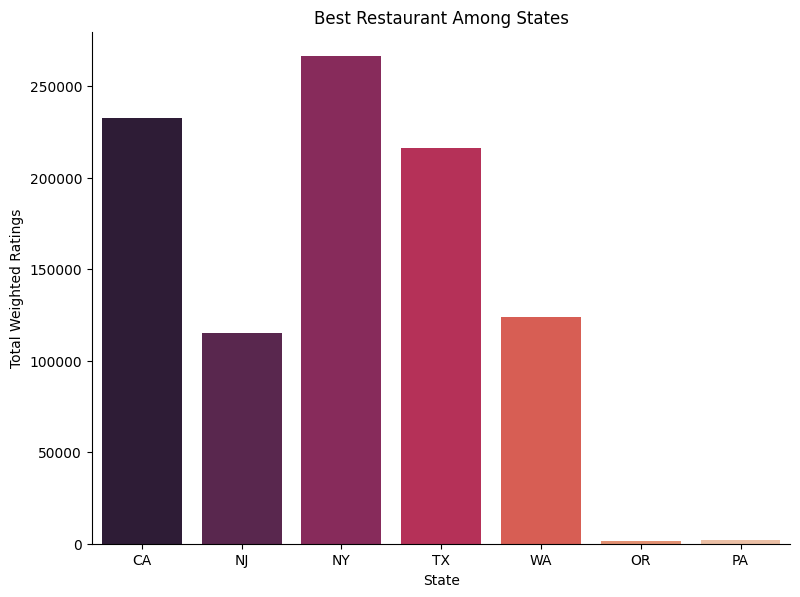

In [ ]:

total_vote_share_list = [df_copy[df_copy.State == i]['No of Reviews'].sum() for i in labels]
total_vote_share = pd.DataFrame({'State':labels, 'Total Weighted Ratings':total_vote_share_list})
plot = sns.catplot(x='State', y="Total Weighted Ratings", kind = 'bar', data= total_vote_share, palette ="rocket")
plt.title('Best Restaurant Among States')
plt.gcf().set_size_inches(9, 6)

<ipython-input-38-1d99913a0e39>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.catplot(x='City', y="Total Weighted Ratings", kind="bar", data=total_wt_ratings, palette="cubehelix")


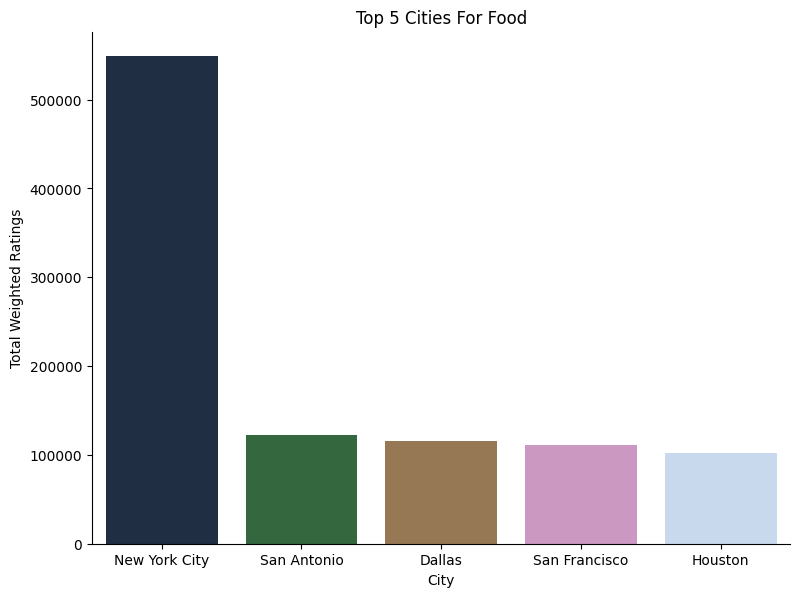

In [ ]:
labels = df_copy['City'].unique().flatten()
total_vote_share_list = [df_copy[df_copy['City']==i].weighted_ratings.sum() for i in labels]
total_wt_ratings = pd.DataFrame({'City':labels, 'Total Weighted Ratings': total_vote_share_list})
total_wt_ratings = total_wt_ratings.sort_values(by=['Total Weighted Ratings'],ascending=False).head(5)
plot = sns.catplot(x='City', y="Total Weighted Ratings", kind="bar", data=total_wt_ratings, palette="cubehelix")
plt.title("Top 5 Cities For Food")
plt.gcf().set_size_inches(9, 6)

In [ ]:
#### Our Main Feature - Comments
df.Comments

,Comments
0,NaN
1,"Both times we were there very late, after 11 P..."
2,Waitress was very friendly but a little pricey...
3,Not sure why I went there for the second time....
4,Doesn't look like much from the outside but wa...
...,...
3057,We had to wait a few minutes to get it but it ...
3058,"Came here to see Andrea Gibson perform, we wer..."
3059,We come to Brio once a month. They are good fo...
3060,Stopped in yesterday for Breakfast. When in Je...


In [ ]:
df = df.dropna(subset=['Comments'])


In [ ]:
### Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

### Construct the required tf-idf matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df.Comments)

### Output Shape of tf-idf matrix
tfidf_matrix.shape

(2447, 6245)

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(df_copy.index, index= df_copy.Name).drop_duplicates()
indices

,0
Name,
Betty Lou's Seafood and Grill,0
Coach House Diner,1
Table Talk Diner,2
Sixty Vines,3
The Clam Bar,4
...,...
Indigo Kitchen & Ale House,3055
City Vineyard,3056
BRIO Tuscan Grille,3057


In [ ]:
def get_hybrid_recommendations(name, cosine_sim=cosine_sim, df=df):
    # Normalize the input name to match the dataset's format
    normalized_name = name.strip().title()  # Example normalization: strip spaces, title case

    if normalized_name not in indices:
        # Find close matches using fuzzy matching or give a helpful error message
        from difflib import get_close_matches
        suggestions = get_close_matches(normalized_name, indices.index, n=5, cutoff=0.6)
        if suggestions:
            return f"Restaurant '{name}' not found. Did you mean: {', '.join(suggestions)}?"
        else:
            return f"Restaurant '{name}' not found. Please check the name and try again."

    # Get the index of the restaurant
    idx = indices[normalized_name]

    # Get similarity scores for all restaurants with the target restaurant
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top 10 most similar restaurants
    sim_scores = sim_scores[1:11]
    restaurant_indices = [i[0] for i in sim_scores]

    # Get the recommended restaurants
    recommended_restaurants = df.iloc[restaurant_indices]

    return recommended_restaurants['Name']


In [ ]:
recommendations = get_hybrid_recommendations('E Tutto Qua')
print(recommendations)


328                       The Slow Bone
422                       The Slow Bone
626              Royal India Restaurant
381            Dashen Ethiopian Cuisine
671                    It's Greek to Me
198                15 Church Restaurant
1748               15 Church Restaurant
876                   Franklin Barbecue
861                     Juliana's Pizza
168     Asian Jewels Seafood Restaurant
Name: Name, dtype: object


# The Issue with Multiple Entries with The Same Restaurant Name

If a restaurant has multiple franchises the model can mistake it as a different establishment. So what i will do is aggregate by restaurant name

In [ ]:
#### v2
def get_hybrid_recommendations(name, cosine_sim=cosine_sim, df=df):
    normalized_name = name.strip().title()  # Normalize the input name

    if normalized_name not in indices:
        from difflib import get_close_matches
        suggestions = get_close_matches(normalized_name, indices.index, n=5, cutoff=0.6)
        if suggestions:
            return f"Restaurant '{name}' not found. Did you mean: {', '.join(suggestions)}?"
        else:
            return f"Restaurant '{name}' not found. Please check the name and try again."

    idx = indices[normalized_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]  # Top 10 most similar restaurants
    restaurant_indices = [i[0] for i in sim_scores]

    # Get the recommended restaurants, removing duplicates by name
    recommended_restaurants = df.iloc[restaurant_indices]
    unique_recommended_restaurants = recommended_restaurants.drop_duplicates(subset='Name')

    return unique_recommended_restaurants['Name'].tolist()
###


In [ ]:
recommendations = get_hybrid_recommendations('E Tutto Qua')
print(recommendations)


['The Slow Bone', 'Royal India Restaurant', 'Dashen Ethiopian Cuisine', "It's Greek to Me", '15 Church Restaurant', 'Franklin Barbecue', "Juliana's Pizza", 'Asian Jewels Seafood Restaurant']


In [ ]:
import pickle

In [ ]:
whos

Variable                     Type               Data/Info
---------------------------------------------------------
TfidfVectorizer              type               <class 'sklearn.feature_e<...>on.text.TfidfVectorizer'>
average_vote_share_list      list               n=7
avg_wt_ratings               DataFrame            State  Average Weighted<...>                   2008.0
ax                           Axes               Axes(0.125,0.11;0.775x0.77)
cosine_sim                   ndarray            2447x2447: 5987809 elems, type `float64`, 47902472 bytes (45.68335723876953 Mb)
cosine_similarity            function           <function cosine_similarity at 0x7992a4666ef0>
df                           DataFrame                                   <...>n[2447 rows x 11 columns]
df_copy                      DataFrame                                   <...>n[3057 rows x 11 columns]
flat_list                    list               n=8660
get_hybrid_recommendations   function           <function get_

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import pickle
import numpy as np

In [ ]:
pip install fastapi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.4 MB/s eta 0:00:00


In [ ]:
app = FastAPI()

In [ ]:


# Assuming tfidf is your TfidfVectorizer instance
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)


In [ ]:
with open('cosine_similarity_matrix.pkl', 'wb') as f:
    pickle.dump(cosine_sim, f)


In [ ]:
from google.colab import files

files.download('tfidf_vectorizer.pkl')
files.download('cosine_similarity_matrix.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

with open('cosine_similarity_matrix.pkl', 'rb') as f:
    cosine_sim = pickle.load(f)
